# Getting the necessary data

You just need to do this only once

In [1]:
!rm -f NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam 2>/dev/null
!rm -f NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam.bai 2>/dev/null
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/exome_alignment/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/exome_alignment/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam.bai

--2018-08-26 16:51:35--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/exome_alignment/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam
           => ‘NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.192.8
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.192.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/exome_alignment ... done.
==> SIZE NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam ... 327067172
==> PASV ... done.    ==> RETR NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam ... done.
Length: 327067172 (312M) (unauthoritative)

NA18489.chrom20.ILL 100%[===================>] 311.92M  9.92MB/s    in 34s     

2018-08-26 16:52:11 (9.18 MB/s) - ‘NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam’ saved [327067172]

--2018-08-26 16:52:11--  ftp:/

# The recipe

In [2]:
#pip install pysam
from collections import defaultdict

import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pysam

/home/tiago/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tiago/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
bam = pysam.AlignmentFile('NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam', 'rb')

In [4]:
headers = bam.header
for record_type, records in headers.items():
    print (record_type)
    for i, record in enumerate(records):
        if type(record) == dict:
            print('\t%d' % (i + 1))
            for field, value in record.items():
                print('\t\t%s\t%s' % (field, value))
        else:
            print('\t\t%s' % record)

HD
		SO
		VN
SQ
	1
		SN	1
		M5	1b22b98cdeb4a9304cb5d48026a85128
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
		LN	249250621
	2
		SN	2
		M5	a0d9851da00400dec1098a9255ac712e
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
		LN	243199373
	3
		SN	3
		M5	fdfd811849cc2fadebc929bb925902e5
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
		LN	198022430
	4
		SN	4
		M5	23dccd106897542ad87d2765d28a19a1
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
		LN	191154276
	5
		SN	5
		M5	0740173db9ffd264d728f32784845cd7
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence

In [5]:
#0-based
for rec in bam:
    if rec.cigarstring.find('M') > -1 and rec.cigarstring.find('S') > -1 and not rec.is_unmapped and not rec.mate_is_unmapped:
        break
print(rec.query_name, rec.reference_id, bam.getrname(rec.reference_id), rec.reference_start, rec.reference_end)
print(rec.cigarstring)
print(rec.query_alignment_start, rec.query_alignment_end, rec.query_alignment_length)
print(rec.next_reference_id, rec.next_reference_start, rec.template_length)
print(rec.is_paired, rec.is_proper_pair, rec.is_unmapped, rec.mapping_quality)
print(rec.query_qualities)
print(rec.query_alignment_qualities)
print(rec.query_sequence)

SRR100025.62130839 19 20 59996 60048
52M24S
0 52 52
19 60228 295
True True False 60
array('B', [33, 34, 36, 33, 39, 34, 33, 38, 39, 34, 40, 35, 40, 40, 32, 40, 38, 33, 35, 38, 33, 39, 40, 34, 37, 39, 36, 30, 36, 37, 34, 35, 34, 40, 37, 34, 38, 28, 40, 40, 38, 32, 33, 32, 36, 34, 37, 24, 34, 35, 31, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
array('B', [33, 34, 36, 33, 39, 34, 33, 38, 39, 34, 40, 35, 40, 40, 32, 40, 38, 33, 35, 38, 33, 39, 40, 34, 37, 39, 36, 30, 36, 37, 34, 35, 34, 40, 37, 34, 38, 28, 40, 40, 38, 32, 33, 32, 36, 34, 37, 24, 34, 35, 31, 2])
CTCAGATCCAGAGGTGGAAGAGGAAGGAAGCTTGGAACCCTATAGAGTTGCTGAGTGCCAGGACCAGATACTGGGC


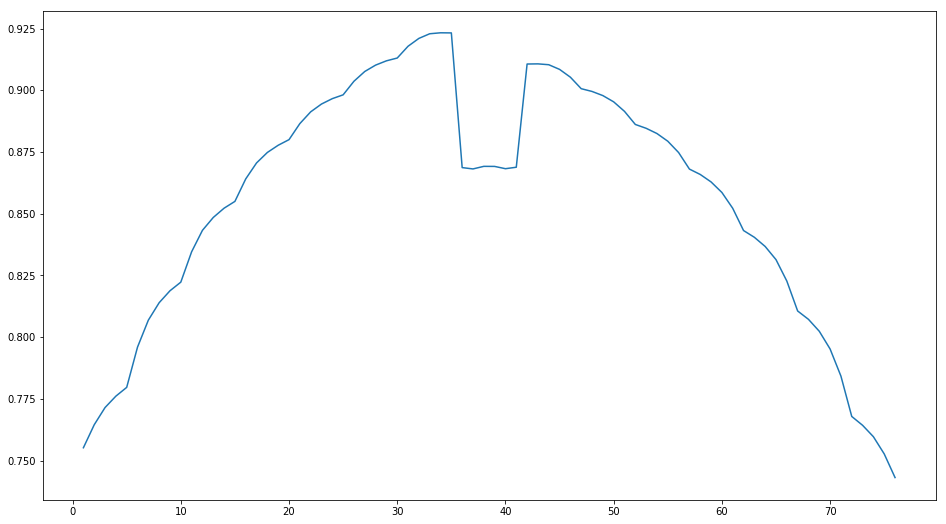

In [6]:
counts = [0] * 76
for n, rec in enumerate(bam.fetch('20', 0, 10000000)):
    for i in range(rec.query_alignment_start, rec.query_alignment_end):
        counts[i] += 1
freqs = [x / (n + 1.) for x in counts]
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(range(1, 77), freqs)

In [7]:
phreds = defaultdict(list)
for rec in bam.fetch('20', 0, None):
    for i in range(rec.query_alignment_start, rec.query_alignment_end):
        phreds[i].append(rec.query_qualities[i])

In [8]:
maxs = [max(phreds[i]) for i in range(76)]
tops = [np.percentile(phreds[i], 95) for i in range(76)]
medians = [np.percentile(phreds[i], 50) for i in range(76)]
bottoms = [np.percentile(phreds[i], 5) for i in range(76)]
medians_fig = [x - y for x, y in zip(medians, bottoms)]
tops_fig = [x - y for x, y in zip(tops, medians)]
maxs_fig = [x - y for x, y in zip(maxs, tops)]

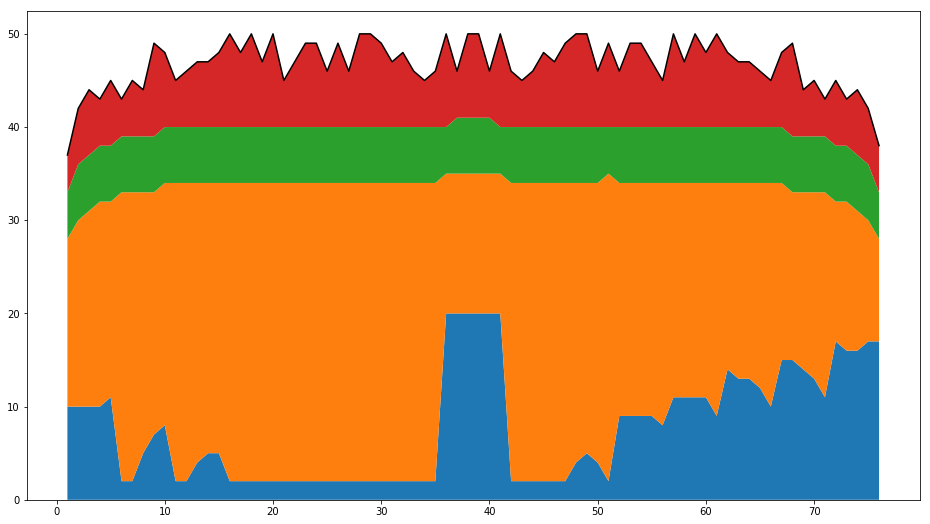

In [9]:
fig, ax = plt.subplots(figsize=(16,9))
ax.stackplot(range(1, 77), (bottoms, medians_fig, tops_fig, maxs_fig))
ax.plot(range(1, 77), maxs, 'k-')